In [1]:
from itertools import chain, zip_longest
from math import ceil, pi

import matplotlib.pyplot as plt

data = [
    ("V1", 8),
    ("V2", 10),
    ("V3", 9),
    ("V4", 12),
    ("V5", 6),
    ("V6", 14),
    ("V7", 15),
    ("V8", 25),
]

In [2]:
def round_up(value):
    """
    >>> round_up(25)
    30
    """
    return int(ceil(value / 10.0)) * 10


def even_odd_merge(even, odd, filter_none=True):
    """
    >>> list(even_odd_merge([1,3], [2,4]))
    [1, 2, 3, 4]
    """
    if filter_none:
        return filter(None.__ne__, chain.from_iterable(zip_longest(even, odd)))

    return chain.from_iterable(zip_longest(even, odd))

In [3]:
def prepare_angles(N):
    angles = [n / N * 2 * pi for n in range(N)]
    
    # Repeat the first angle to close the circle
    angles += angles[:1]

    return angles


def prepare_data(data):
    categories = [d[0] for d in data]
    values = [d[1] for d in data]
    
    # Repeat the first value to close the circle
    values += values[:1]
    
    N = len(categories)
    angles = prepare_angles(N)

    return categories, values, angles, N


def prepare_stellar_aux_data(angles, ymax, N):
    angle_midpoint = pi / N

    stellar_angles = [angle + angle_midpoint for angle in angles[:-1]]
    stellar_values = [0.05 * ymax] * N

    return stellar_angles, stellar_values

In [4]:
def draw_peripherals(ax, categories, angles, ymax, outer_color, inner_color):
    # X-axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color=outer_color, size=8)
    
    # Y-axis
    ax.set_yticks(range(10, ymax, 10))
    ax.set_yticklabels(range(10, ymax, 10), color=inner_color, size=7)
    ax.set_ylim(0, ymax)
    ax.set_rlabel_position(0)
    
    # Both axes
    ax.set_axisbelow(True)
    
    # Boundary line
    ax.spines["polar"].set_color(outer_color)

    # Grid lines
    ax.xaxis.grid(True, color=inner_color, linestyle="-")
    ax.yaxis.grid(True, color=inner_color, linestyle="-")

In [5]:
def draw_radar(
    ax,
    categories,
    values,
    angles,
    N,
    shape_color="tab:blue",
    outer_color="slategrey",
    inner_color="lightgrey",
):
    ymax = round_up(max(values))

    draw_peripherals(ax, categories, angles, ymax, outer_color, inner_color)

    ax.plot(
        angles,
        values,
        linewidth=1,
        linestyle="solid",
        solid_joinstyle="round",
        color=shape_color,
    )

    ax.fill(angles, values, shape_color, alpha=0.1)

In [6]:
def draw_stellar(
    ax,
    categories,
    values,
    angles,
    N,
    shape_color="tab:blue",
    outer_color="slategrey",
    inner_color="lightgrey",
):
    # Limit the Y-axis according to the data to be plotted
    ymax = round_up(max(values))
    
    # Get the lists of angles and variable values 
    # with the necessary auxiliary values injected
    stellar_angles, stellar_values = prepare_stellar_aux_data(angles, ymax, N)
    all_angles = list(even_odd_merge(angles, stellar_angles))
    all_values = list(even_odd_merge(values, stellar_values))
    
    # Apply the desired style to the figure elements
    draw_peripherals(ax, categories, angles, ymax, outer_color, inner_color)
    
    # Draw (and fill) the star-shaped outer line
    ax.plot(
        all_angles,
        all_values,
        linewidth=1,
        linestyle="solid",
        solid_joinstyle="round",
        color=shape_color,
    )
    
    ax.fill(all_angles, all_values, shape_color)

    # Add a small hole in the center of the chart
    ax.plot(0, 0, marker="o", color="white", markersize=3)

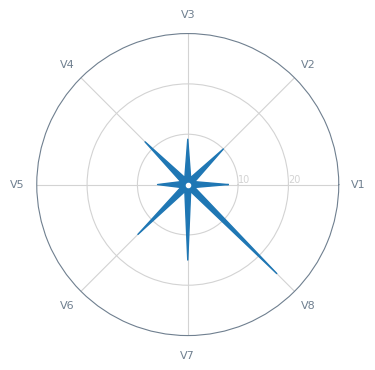

In [7]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, polar=True)  # Don't forget the projection!

fig_size = fig.get_size_inches()

draw_stellar(ax, *prepare_data(data))

# fig.savefig("stellar_chart.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

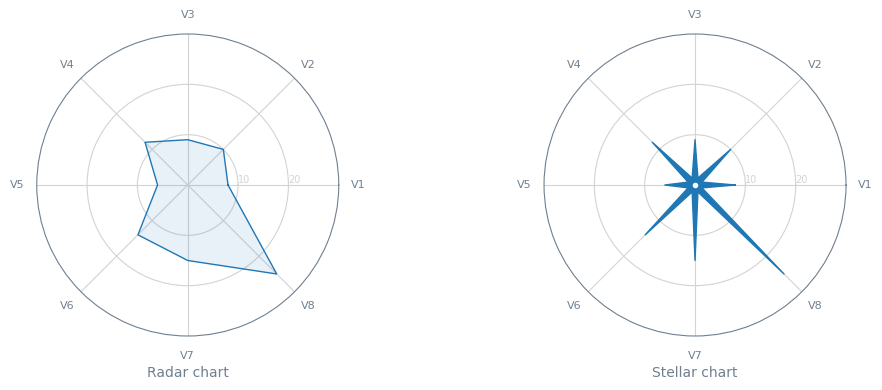

In [8]:
fig, axes = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=100,
    figsize=(fig_size[0] * 2, fig_size[1]),
    subplot_kw=dict(polar=True),
)

draw_radar(axes[0], *prepare_data(data))
draw_stellar(axes[1], *prepare_data(data))

axes[0].set_xlabel("Radar chart", color="slategrey")
axes[1].set_xlabel("Stellar chart", color="slategrey")

# fig.savefig("radar_stellar_chart.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

---